In [ ]:
url = "https://raw.githubusercontent.com/mertyesilbas/Lung-Cancer-Prediction/main/survey%20lung%20cancer.csv"

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import os



In [ ]:
data = pd.read_csv(url)

In [ ]:
train_df = data.copy()

In [ ]:
train_df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
train_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
train_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Analysis of Numerical Variables

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution".format(variable))
    plt.show()

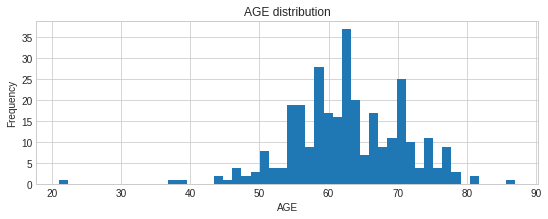

In [ ]:
numericVar = ["AGE"]
for n in numericVar:
    plot_hist(n)

In [ ]:
# Analysis of Categorical Variables

In [ ]:
def bar_plot(variable):

    var = train_df[variable]
    varValue = var.value_counts()
    
    # görselleştirme
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

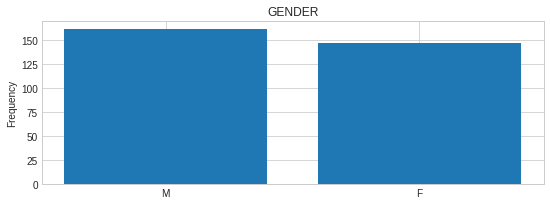

GENDER: 
 M    162
F    147
Name: GENDER, dtype: int64


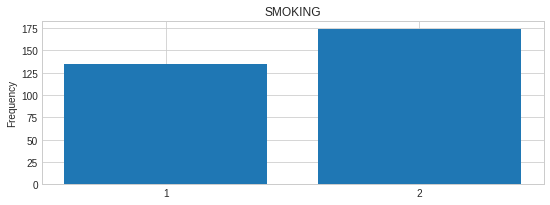

SMOKING: 
 2    174
1    135
Name: SMOKING, dtype: int64


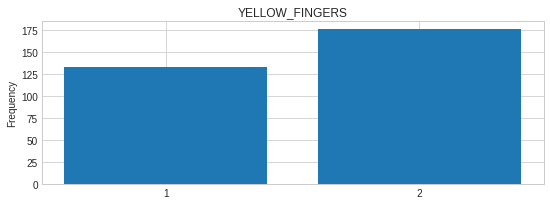

YELLOW_FINGERS: 
 2    176
1    133
Name: YELLOW_FINGERS, dtype: int64


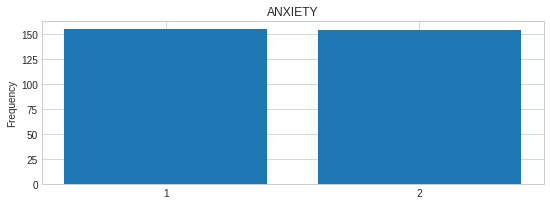

ANXIETY: 
 1    155
2    154
Name: ANXIETY, dtype: int64


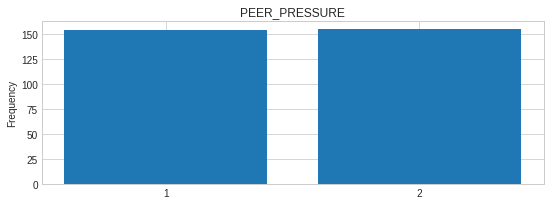

PEER_PRESSURE: 
 2    155
1    154
Name: PEER_PRESSURE, dtype: int64


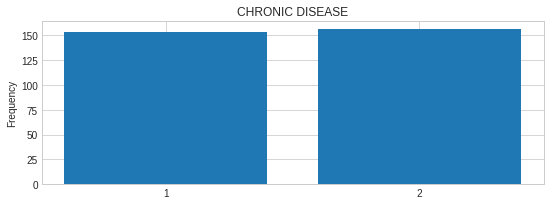

CHRONIC DISEASE: 
 2    156
1    153
Name: CHRONIC DISEASE, dtype: int64


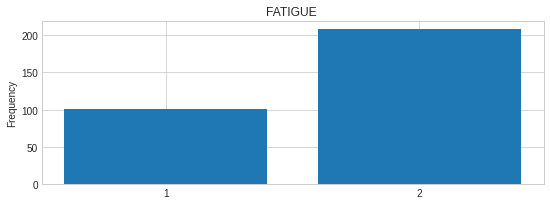

FATIGUE : 
 2    208
1    101
Name: FATIGUE , dtype: int64


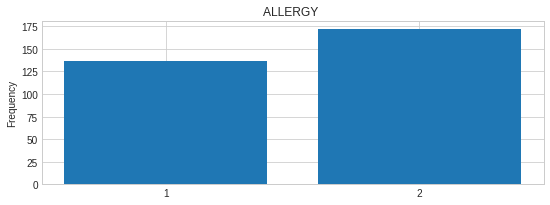

ALLERGY : 
 2    172
1    137
Name: ALLERGY , dtype: int64


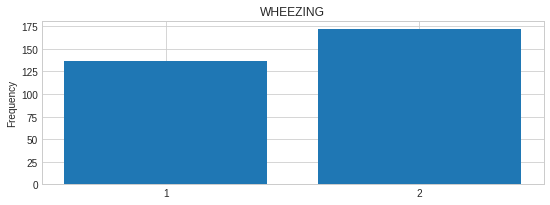

WHEEZING: 
 2    172
1    137
Name: WHEEZING, dtype: int64


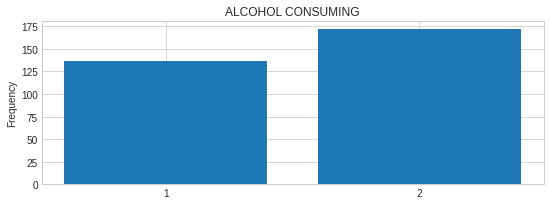

ALCOHOL CONSUMING: 
 2    172
1    137
Name: ALCOHOL CONSUMING, dtype: int64


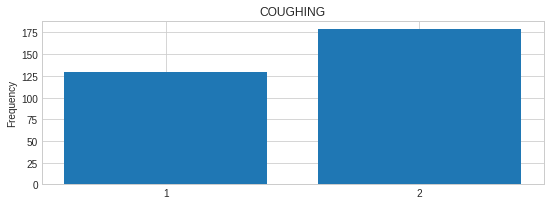

COUGHING: 
 2    179
1    130
Name: COUGHING, dtype: int64


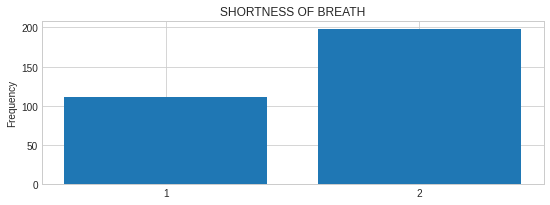

SHORTNESS OF BREATH: 
 2    198
1    111
Name: SHORTNESS OF BREATH, dtype: int64


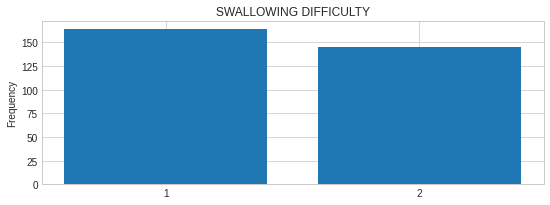

SWALLOWING DIFFICULTY: 
 1    164
2    145
Name: SWALLOWING DIFFICULTY, dtype: int64


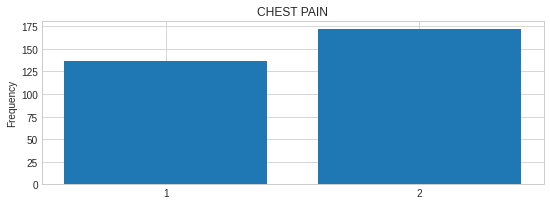

CHEST PAIN: 
 2    172
1    137
Name: CHEST PAIN, dtype: int64


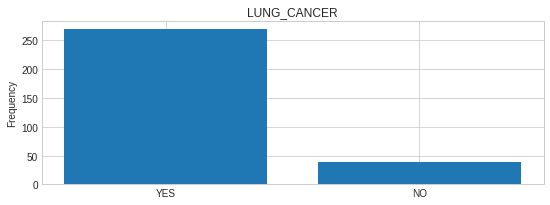

LUNG_CANCER: 
 YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


In [ ]:
category1 = ["GENDER","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE", "CHRONIC DISEASE","FATIGUE ", "ALLERGY ", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN", "LUNG_CANCER"]
for c in category1:
    bar_plot(c)

In [ ]:
train_df["GENDER"] = train_df["GENDER"].map({"F": 0, "M": 1})
train_df['LUNG_CANCER']= train_df['LUNG_CANCER'].map({'NO':0, "YES":1})

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

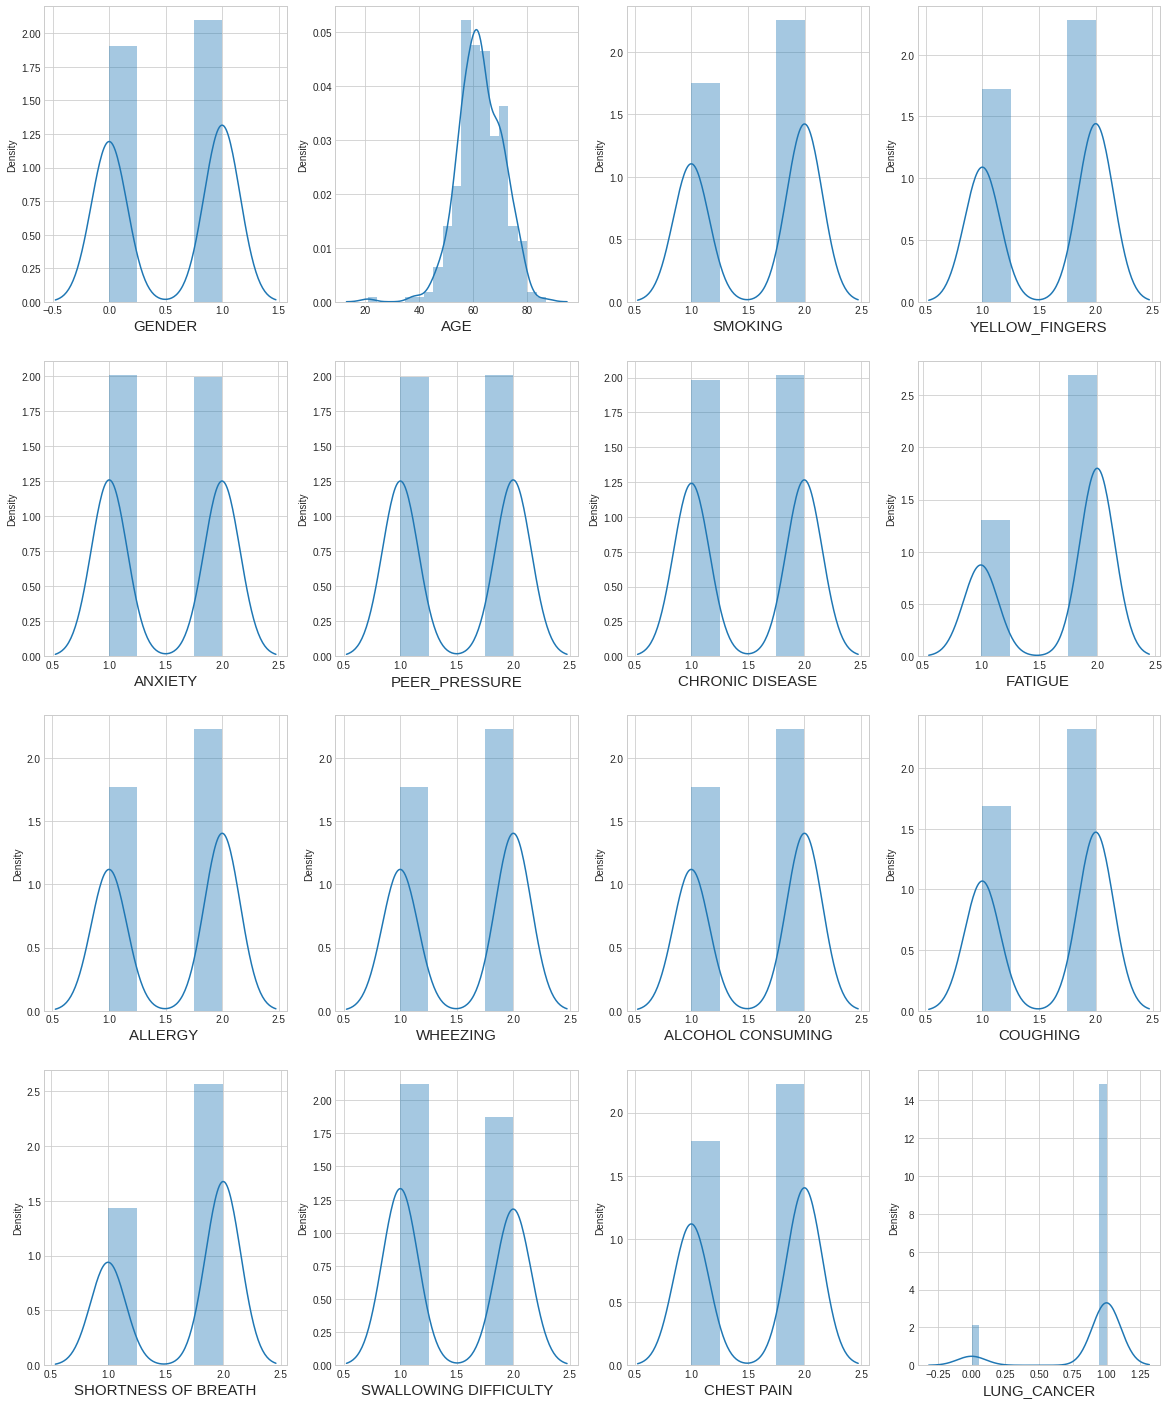

In [ ]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in train_df:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(train_df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

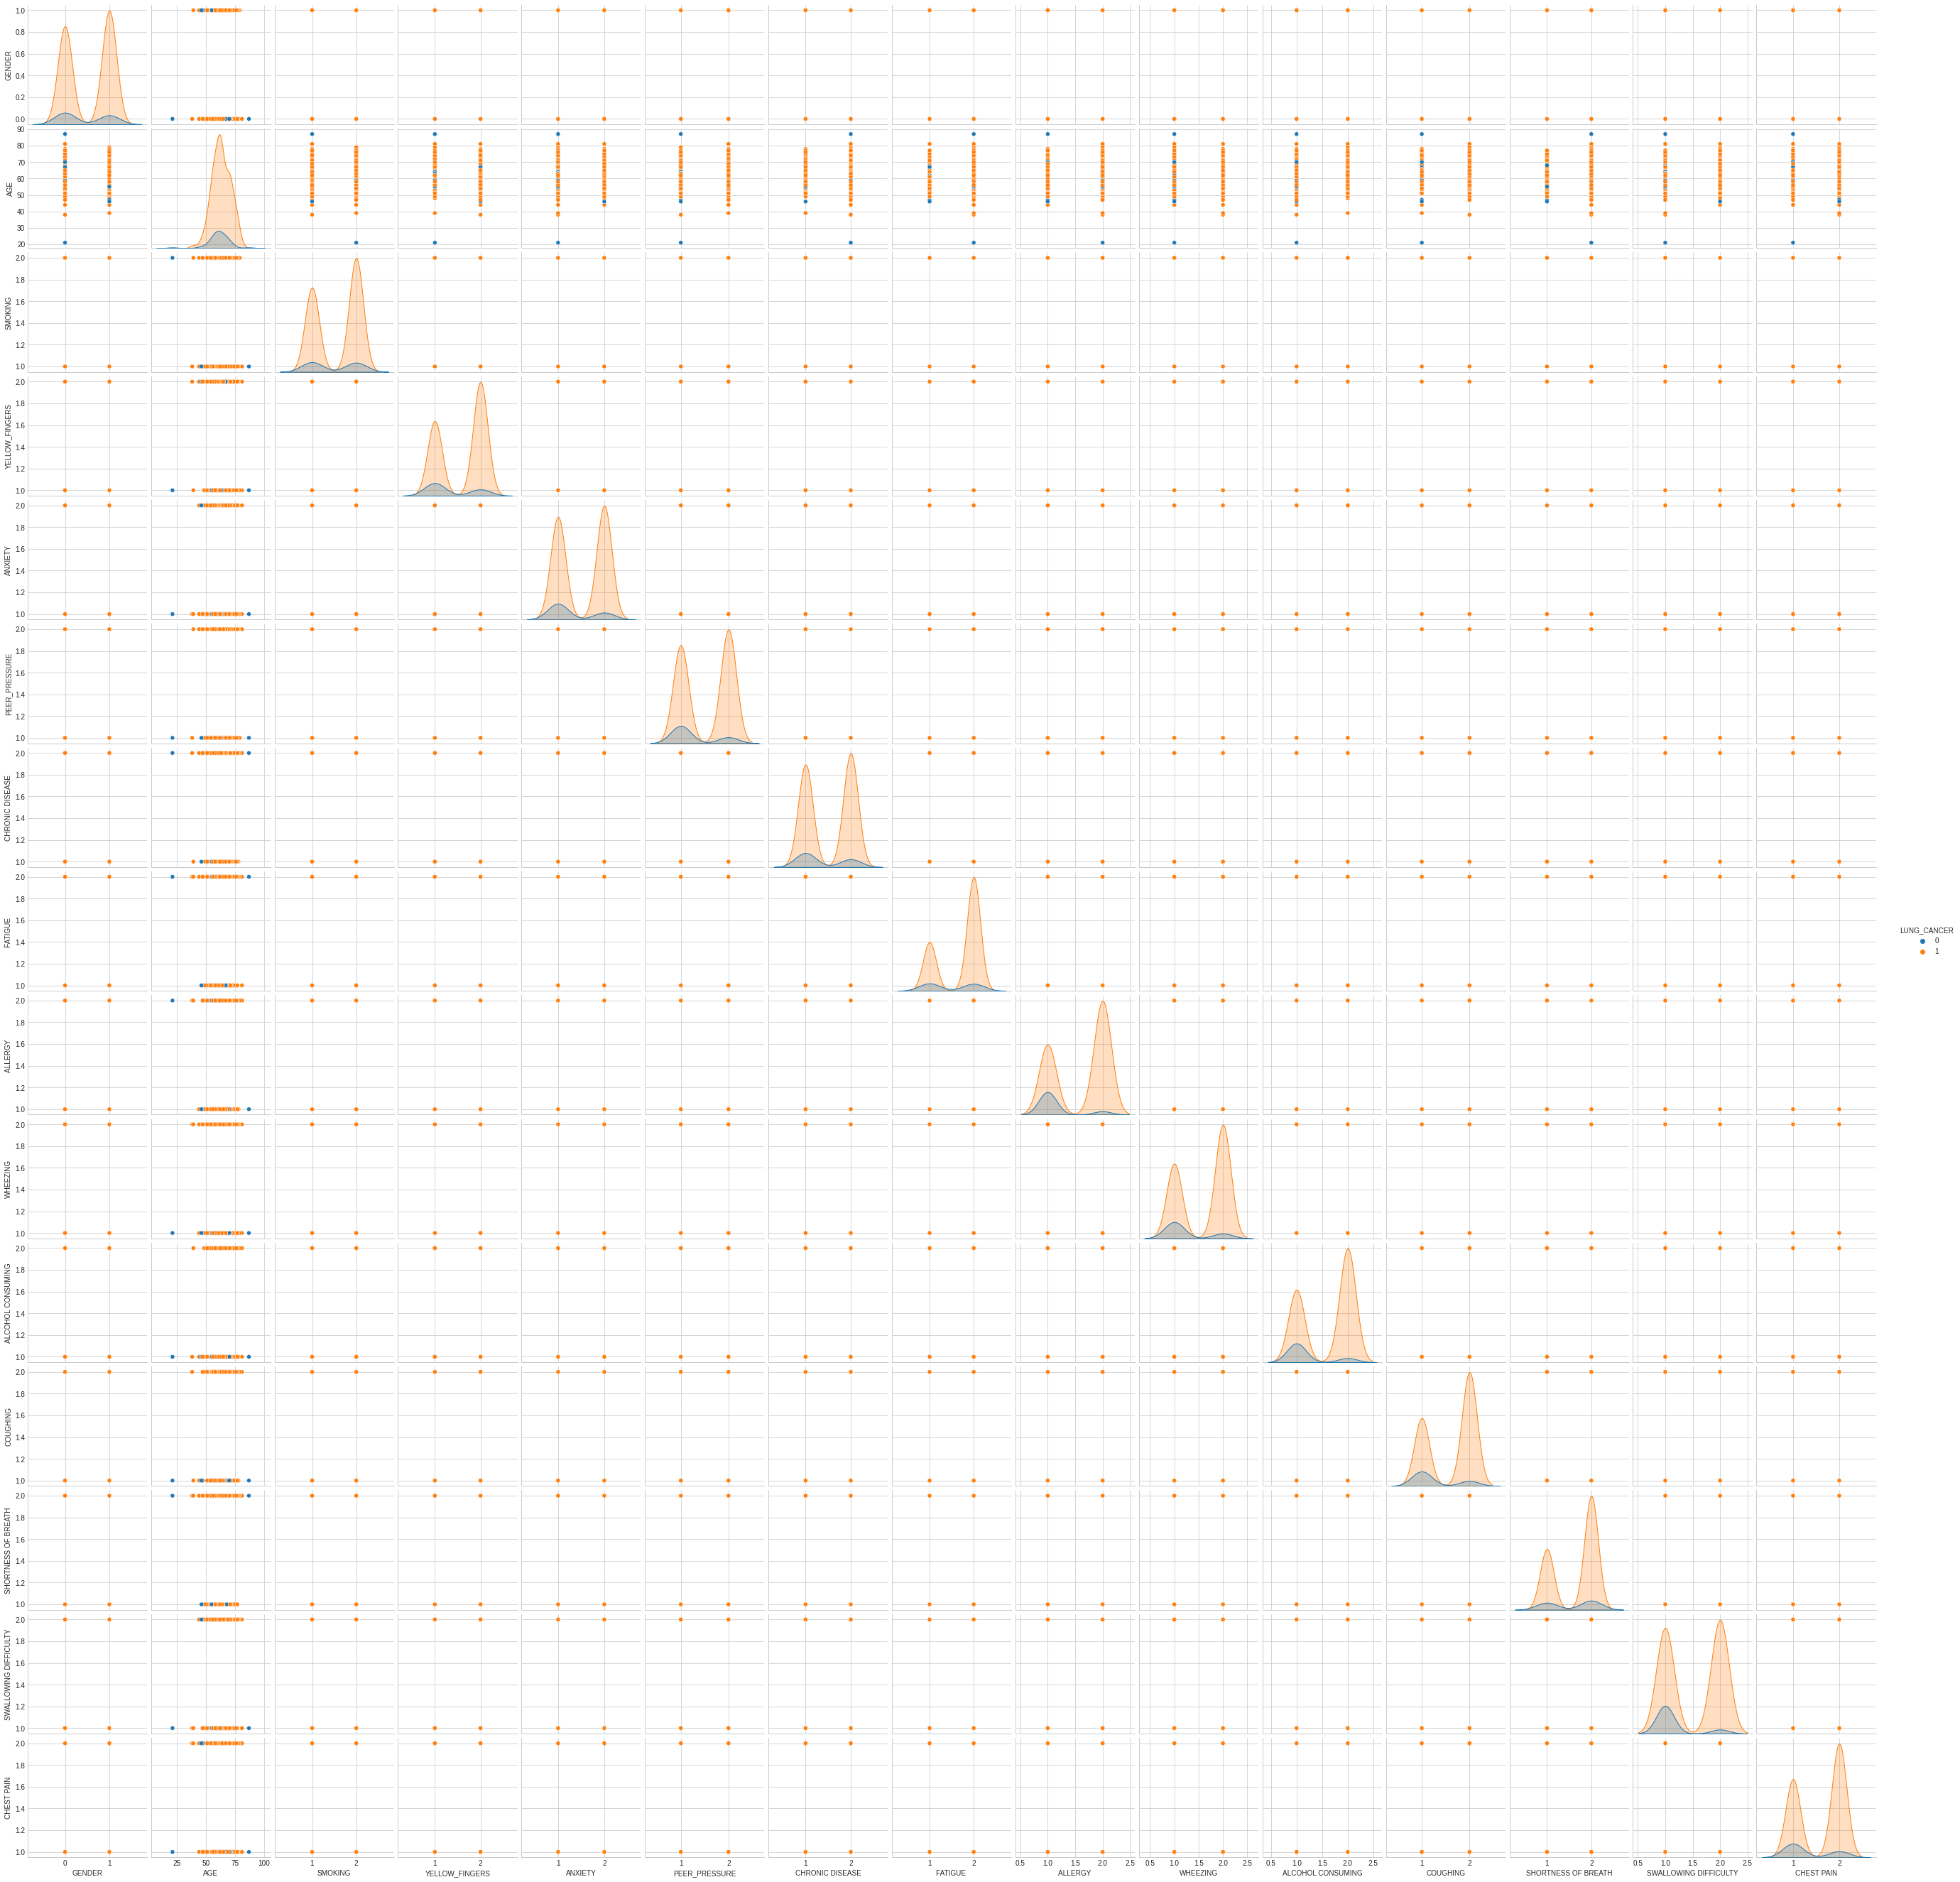

In [ ]:
sns.pairplot(train_df,hue='LUNG_CANCER')
plt.legend()
plt.show()

In [ ]:
train_df["LUNG_CANCER"].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
print("Number of cells with null values: " , train_df.isnull().sum().sum())

Number of cells with null values:  0


In [ ]:
print("Number of cells with null values: " , train_df.duplicated().sum())

Number of cells with null values:  33


In [ ]:
df = train_df.drop_duplicates()

In [ ]:
# Fundamental Data Analysis

# Gender and Lung Cancer Analysis
train_df[["GENDER","LUNG_CANCER"]].groupby(["GENDER"], as_index = False).mean()



,GENDER,LUNG_CANCER
0,0,0.850340
1,1,0.895062


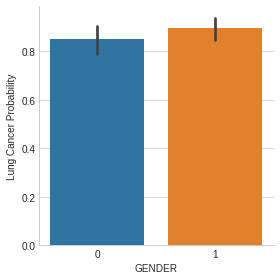

In [ ]:
g = sns.factorplot(x = "GENDER", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:

train_df[["AGE","LUNG_CANCER"]].groupby(["AGE"], as_index = False).mean().sort_values(by="LUNG_CANCER",ascending = False )

,AGE,LUNG_CANCER
35,78,1.000000
22,65,1.000000
36,79,1.000000
23,66,1.000000
29,72,1.000000
30,73,1.000000
31,74,1.000000
32,75,1.000000
33,76,1.000000
11,54,1.000000


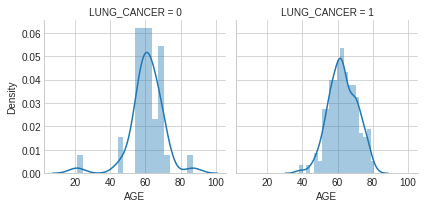

In [ ]:
g = sns.FacetGrid(train_df, col = "LUNG_CANCER")
g.map(sns.distplot, "AGE", bins = 20)
plt.show()

In [ ]:
# Smoking and Lung Cancer Analysis

train_df[["SMOKING","LUNG_CANCER"]].groupby(["SMOKING"], as_index = False).mean()

,SMOKING,LUNG_CANCER
0,1,0.851852
1,2,0.890805


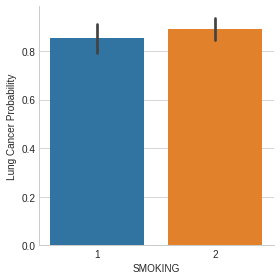

In [ ]:
g = sns.factorplot(x = "SMOKING", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Yellow Fingers and Lung Cancer Analysis

train_df[["YELLOW_FINGERS","LUNG_CANCER"]].groupby(["YELLOW_FINGERS"], as_index = False).mean()

,YELLOW_FINGERS,LUNG_CANCER
0,1,0.804511
1,2,0.926136


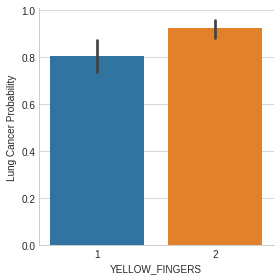

In [ ]:
g = sns.factorplot(x = "YELLOW_FINGERS", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Anxiety and Lung Cancer Analysis

train_df[["ANXIETY","LUNG_CANCER"]].groupby(["ANXIETY"], as_index = False).mean()

,ANXIETY,LUNG_CANCER
0,1,0.825806
1,2,0.922078


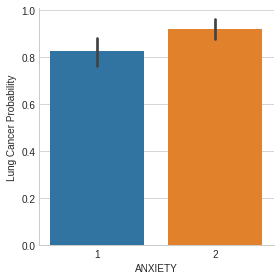

In [ ]:
g = sns.factorplot(x = "ANXIETY", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Peer Pressure and Lung Cancer Analysis

train_df[["PEER_PRESSURE","LUNG_CANCER"]].groupby(["PEER_PRESSURE"], as_index = False).mean()

,PEER_PRESSURE,LUNG_CANCER
0,1,0.811688
1,2,0.935484


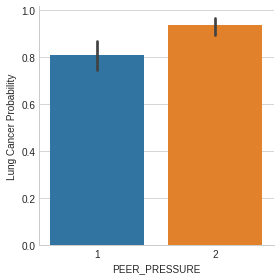

In [ ]:
g = sns.factorplot(x = "PEER_PRESSURE", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Chronic Disease and Lung Cancer Analysis

train_df[["CHRONIC DISEASE","LUNG_CANCER"]].groupby(["CHRONIC DISEASE"], as_index = False).mean()

,CHRONIC DISEASE,LUNG_CANCER
0,1,0.836601
1,2,0.910256


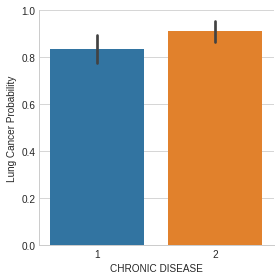

In [ ]:
g = sns.factorplot(x = "CHRONIC DISEASE", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Fatigue and Lung Cancer Analysis

train_df[["FATIGUE ","LUNG_CANCER"]].groupby(["FATIGUE "], as_index = False).mean()

,FATIGUE,LUNG_CANCER
0,1,0.801980
1,2,0.908654


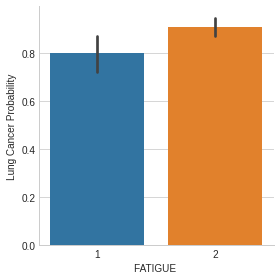

In [ ]:
g = sns.factorplot(x = "FATIGUE ", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Allergy and Lung Cancer Analysis

train_df[["ALLERGY ","LUNG_CANCER"]].groupby(["ALLERGY "], as_index = False).mean()

,ALLERGY,LUNG_CANCER
0,1,0.751825
1,2,0.970930


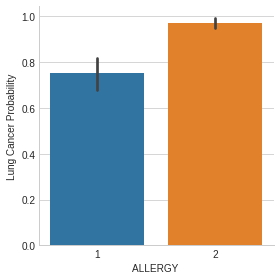

In [ ]:
g = sns.factorplot(x = "ALLERGY ", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Wheezing and Lung Cancer Analysis

train_df[["WHEEZING","LUNG_CANCER"]].groupby(["WHEEZING"], as_index = False).mean()

,WHEEZING,LUNG_CANCER
0,1,0.781022
1,2,0.947674


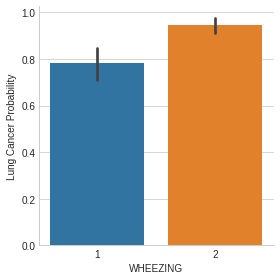

In [ ]:
g = sns.factorplot(x = "WHEEZING", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Alcohol Consuming and Lung Cancer Analysis

train_df[["ALCOHOL CONSUMING","LUNG_CANCER"]].groupby(["ALCOHOL CONSUMING"], as_index = False).mean()

,ALCOHOL CONSUMING,LUNG_CANCER
0,1,0.766423
1,2,0.959302


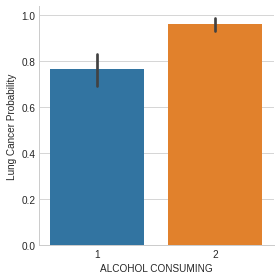

In [ ]:
g = sns.factorplot(x = "ALCOHOL CONSUMING", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Coughing and Lung Cancer Analysis

train_df[["COUGHING","LUNG_CANCER"]].groupby(["COUGHING"], as_index = False).mean()

,COUGHING,LUNG_CANCER
0,1,0.776923
1,2,0.944134


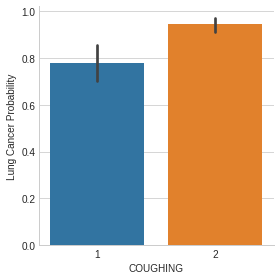

In [ ]:
g = sns.factorplot(x = "COUGHING", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Shortness of Breath and Lung Cancer Analysis

train_df[["SHORTNESS OF BREATH","LUNG_CANCER"]].groupby(["SHORTNESS OF BREATH"], as_index = False).mean()

,SHORTNESS OF BREATH,LUNG_CANCER
0,1,0.846847
1,2,0.888889


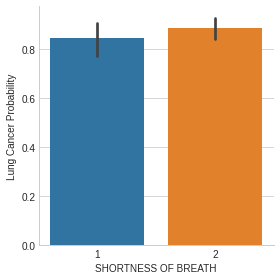

In [ ]:
g = sns.factorplot(x = "SHORTNESS OF BREATH", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Swallowing Difficulty and Lung Cancer Analysis

train_df[["SWALLOWING DIFFICULTY","LUNG_CANCER"]].groupby(["SWALLOWING DIFFICULTY"], as_index = False).mean()

,SWALLOWING DIFFICULTY,LUNG_CANCER
0,1,0.792683
1,2,0.965517


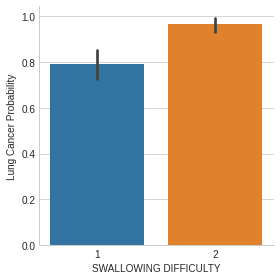

In [ ]:
g = sns.factorplot(x = "SWALLOWING DIFFICULTY", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

In [ ]:
# Chest Pain and Lung Cancer Analysis

train_df[["CHEST PAIN","LUNG_CANCER"]].groupby(["CHEST PAIN"], as_index = False).mean()

,CHEST PAIN,LUNG_CANCER
0,1,0.802920
1,2,0.930233


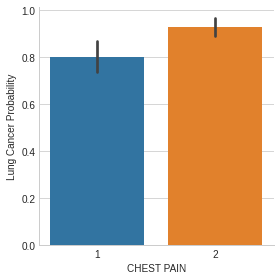

In [ ]:
g = sns.factorplot(x = "CHEST PAIN", y = "LUNG_CANCER", data = train_df, kind = "bar", size = 4)
g.set_ylabels("Lung Cancer Probability")
plt.show()

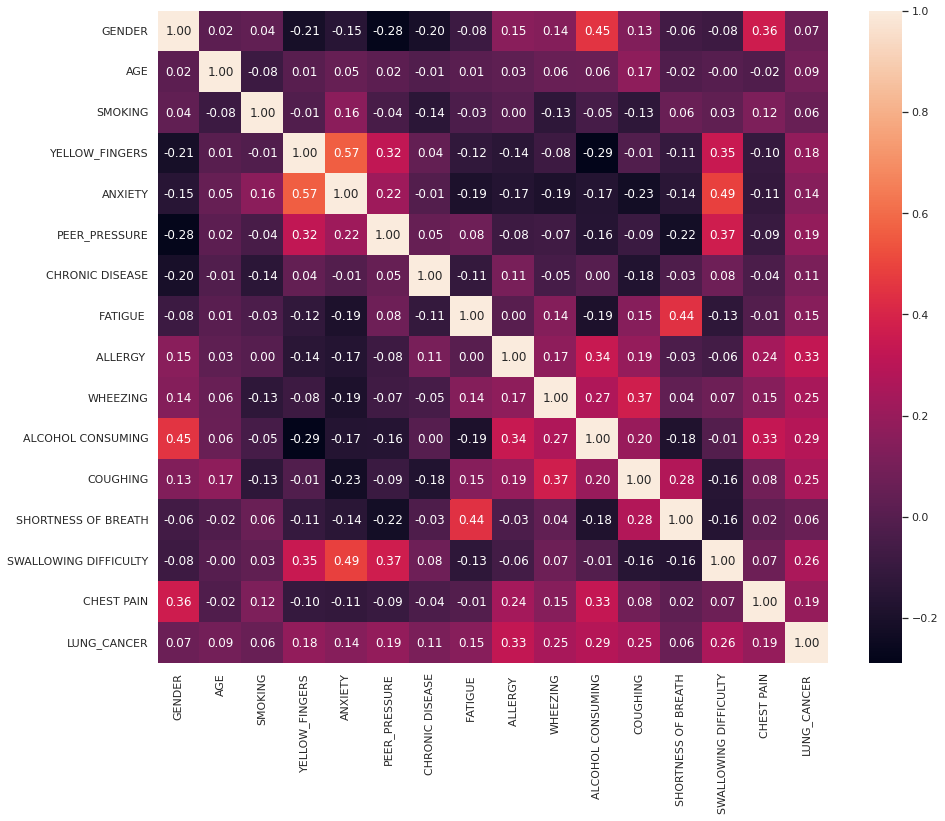

In [ ]:
# Correlation Matrix

list1 = ["GENDER", "AGE", "SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE", "CHRONIC DISEASE","FATIGUE ", "ALLERGY ", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN", "LUNG_CANCER"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
sns.set(rc = {'figure.figsize':(30,24)})
plt.show()

In [ ]:
# Modelling

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Seperation of Train-Test Data

# Dependent and Independent Variable Selection
X = train_df.drop(["LUNG_CANCER"], axis=1)
y = train_df["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 ) #test-train data split - 20/80
#X_train[0:10]  # First 10 row of train set
print("X_train : ",len(X_train))
print("X_test : ",len(X_test))
print("y_train : ",len(y_train))
print("y_test : ",len(y_test))

X_train :  247
X_test :  62
y_train :  247
y_test :  62


In [ ]:
X_train.shape

(247, 15)

In [ ]:
X_test.shape

(62, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Simple Logistic Regression

# Training Model with Default Datas
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
logreg.fit(X_train, y_train)  #X_train has features and y_train has cancer state
y_pred = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) # model educated
acc_log_test = round(logreg.score(X_test,y_test)*100,2) # looking to the test for evaluationing the model
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 92.71
Test Accuracy: % 96.77


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.93338744, -1.39514731,  0.87423436, ...,  0.71787006,
        -0.86704847,  0.91830473],
       [ 0.93338744, -1.14705416, -1.14385804, ...,  0.71787006,
        -0.86704847,  0.91830473],
       [ 0.93338744,  0.58959789, -1.14385804, ...,  0.71787006,
        -0.86704847, -1.08896313],
       ...,
       [-1.07136646, -0.15468156,  0.87423436, ...,  0.71787006,
         1.15333806, -1.08896313],
       [-1.07136646,  0.96173762,  0.87423436, ...,  0.71787006,
        -0.86704847, -1.08896313],
       [ 0.93338744,  0.21745817,  0.87423436, ...,  0.71787006,
        -0.86704847,  0.91830473]])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 1,  1],
       [ 1, 59]])

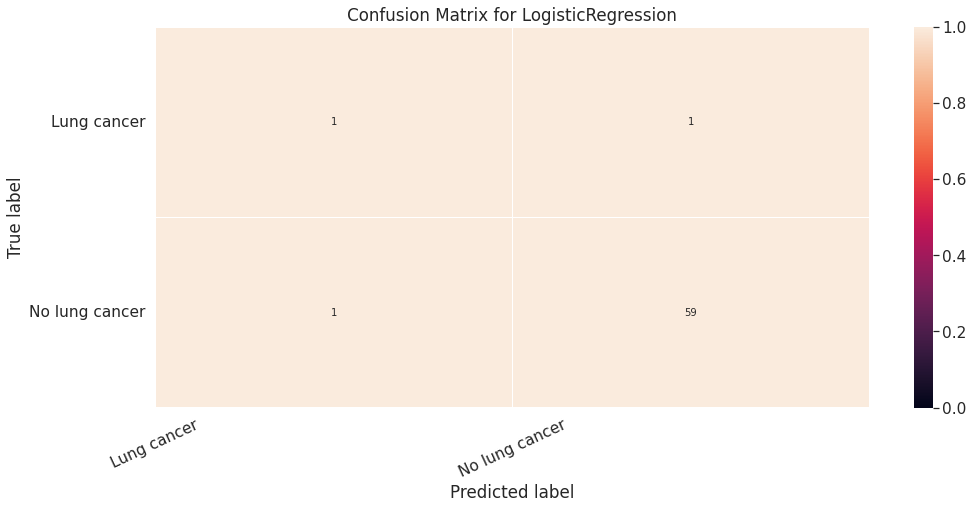

In [ ]:
#plot as heatmap
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

#plot settings
class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
random_state = 42

In [ ]:
# Decision Tree

dt = DecisionTreeClassifier(random_state = random_state)
dt_param_grid = {"min_samples_split" : range(10,500,20),
                 "max_depth": range(1,20,2)
                }

#clf = GridSearchCV(dt, param_grid=dt_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1) 
clf = GridSearchCV(dt, param_grid=dt_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1)
clf.fit(X_train,y_train)
y_pred_dt = clf.predict(X_test)
acc_dt_train = round(clf.score(X_train, y_train)*100,2) 
acc_dt_test = round(clf.score(X_test,y_test)*100,2) 
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))


cv_result_dt = clf.best_score_ 
best_estimators_dt = clf.best_estimator_ 
print("Decision Tree Best Score : ", cv_result_dt)
print("Best Estimator : ", best_estimators_dt)

Training Accuracy: % 92.71
Test Accuracy: % 93.55
Decision Tree Best Score :  0.8744999999999999
Best Estimator :  DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix

array([[ 1,  1],
       [ 3, 57]])

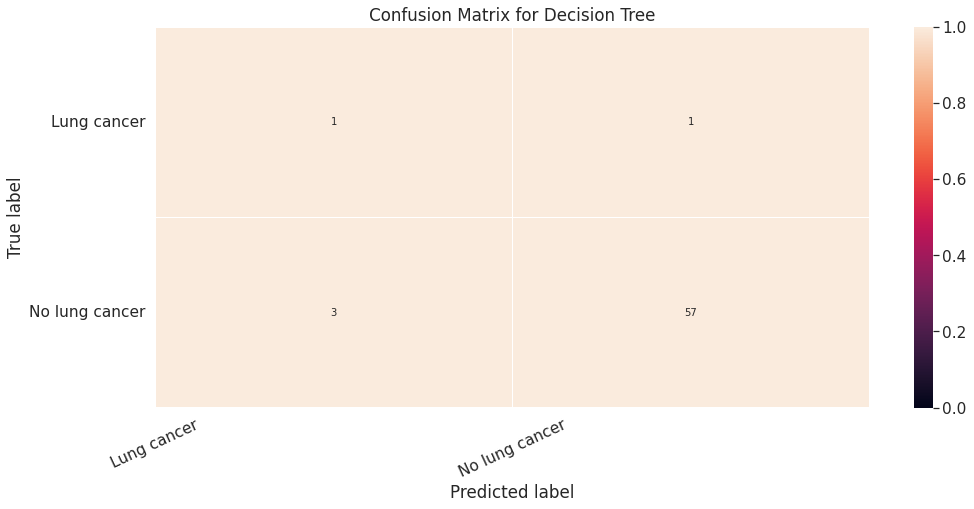

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



In [ ]:
#Support-Vector-Classifier

svc = SVC(random_state = random_state)
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]
             }

clf = GridSearchCV(svc, param_grid=svc_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1)
clf.fit(X_train,y_train)
y_pred_svc = clf.predict(X_test)
acc_svc_train = round(clf.score(X_train, y_train)*100,2) 
acc_svc_test = round(clf.score(X_test,y_test)*100,2) 
print("Training Accuracy: % {}".format(acc_svc_train))
print("Test Accuracy: % {}".format(acc_svc_test))

cv_result_svc = clf.best_score_ 
best_estimators_svc = clf.best_estimator_ 
print("SVC Best Score : ", cv_result_svc)
print("Best Estimator : ", best_estimators_svc)

Training Accuracy: % 94.33
Test Accuracy: % 96.77
SVC Best Score :  0.9069999999999998
Best Estimator :  SVC(C=1000, gamma=0.001, random_state=42)


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)
conf_matrix

array([[ 1,  1],
       [ 1, 59]])

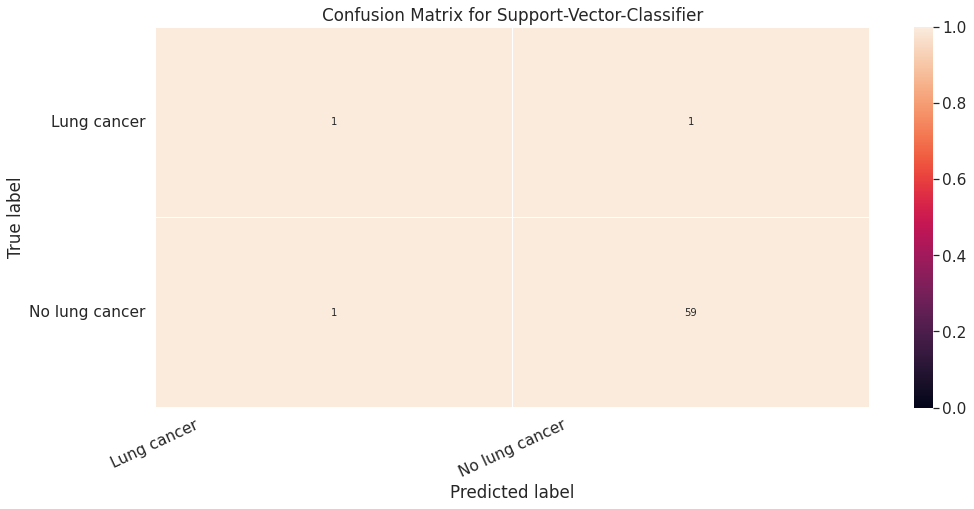

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Support-Vector-Classifier')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
#Random Forest

rf = RandomForestClassifier(random_state = random_state)
rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],  #en iyiyi bulmak için 100 yapılıyor genelde
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]
             }


clf = GridSearchCV(rf, param_grid=rf_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1)
clf.fit(X_train,y_train)
y_pred_rf = clf.predict(X_test)
acc_rf_train = round(clf.score(X_train, y_train)*100,2)
acc_rf_test = round(clf.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

cv_result_rf = clf.best_score_ 
best_estimators_rf = clf.best_estimator_ 
print("Random Forest Best Score : ", cv_result_rf)
print("Best Estimators : ", best_estimators_rf)

Training Accuracy: % 97.17
Test Accuracy: % 96.77
Random Forest Best Score :  0.8906666666666666
Best Estimators :  RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       n_estimators=300, random_state=42)


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[ 1,  1],
       [ 1, 59]])

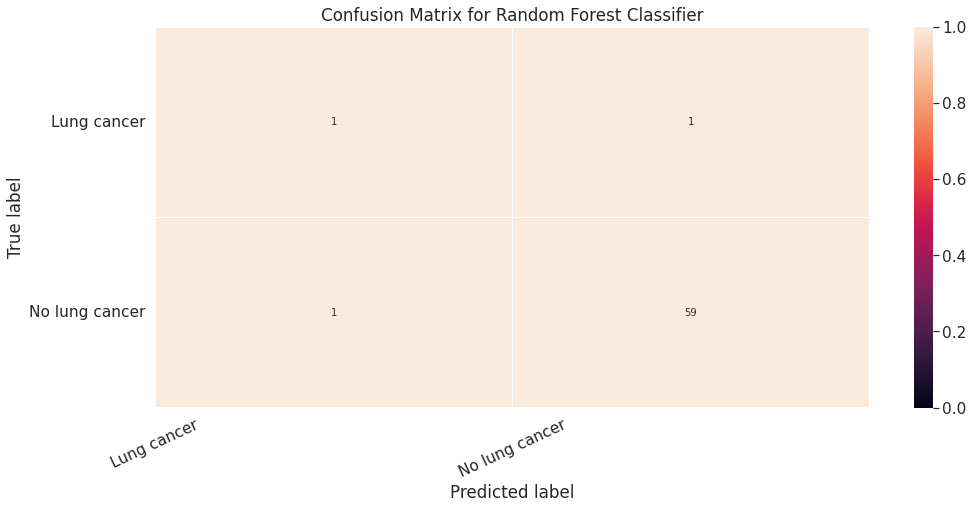

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
#Logistic Regression
lr = LogisticRegression(random_state = random_state)
param_grid = {"C":np.logspace(-3,3,7),  #-3 ten 3 e kadar 7 tane sayı istiyorum
                    "penalty": ["l1","l2"] 
             }  


clf = GridSearchCV(lr, param_grid=param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1)
clf.fit(X_train,y_train)
y_pred_lr = clf.predict(X_test)
acc_lr_train = round(clf.score(X_train, y_train)*100,2)
acc_lr_test = round(clf.score(X_test,y_test)*100,2) 
print("Training Accuracy: % {}".format(acc_lr_train))
print("Test Accuracy: % {}".format(acc_lr_test))

cv_result_lr = clf.best_score_  
best_estimators_lr = clf.best_estimator_ 
print("Logistic Regression Best Score : ", cv_result_lr)
print("Best Estimators : ", best_estimators_lr)

Training Accuracy: % 92.71
Test Accuracy: % 96.77
Logistic Regression Best Score :  0.9191666666666667
Best Estimators :  LogisticRegression(random_state=42)


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
conf_matrix

array([[ 1,  1],
       [ 1, 59]])

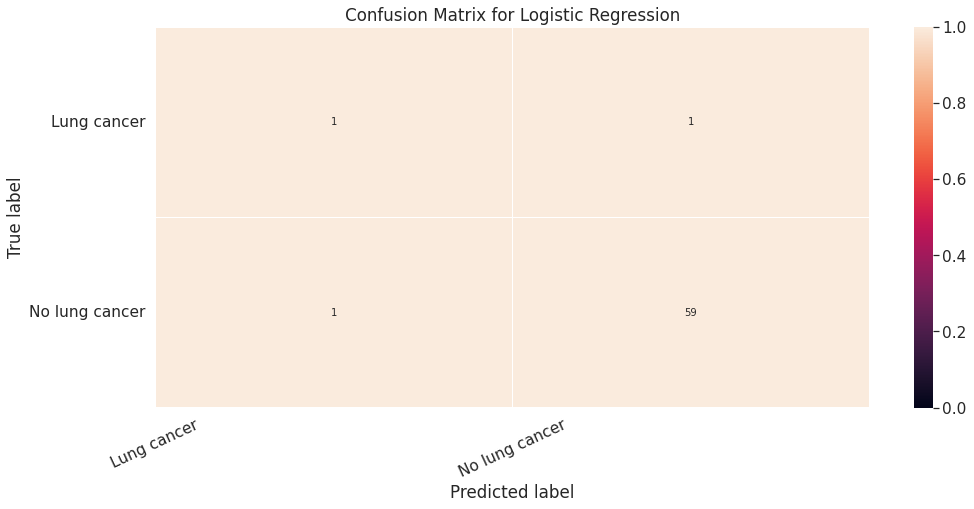

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
#KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),  #1den 19 a kadar 10 tane yazdır  #linspace float bir deger üretiyor ama m sayısı float bir değer olamaz o nedenle dtype = int diyoruz
                 "weights": ["uniform","distance"], 
                 "metric":["euclidean","manhattan"]
             }  


clf = GridSearchCV(knn, param_grid=param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1)
clf.fit(X_train,y_train)
y_pred_knn = clf.predict(X_test)
acc_knn_train = round(clf.score(X_train, y_train)*100,2) 
acc_knn_test = round(clf.score(X_test,y_test)*100,2) 
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

cv_result_knn = clf.best_score_  
best_estimators_knn = clf.best_estimator_ 
print("KNeighborsClassifier Best Score : ", cv_result_knn)
print("Best Estimators : ", best_estimators_knn)

Training Accuracy: % 90.69
Test Accuracy: % 95.16
KNeighborsClassifier Best Score :  0.8983333333333334
Best Estimators :  KNeighborsClassifier(metric='manhattan', n_neighbors=7)


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
conf_matrix

array([[ 1,  1],
       [ 2, 58]])

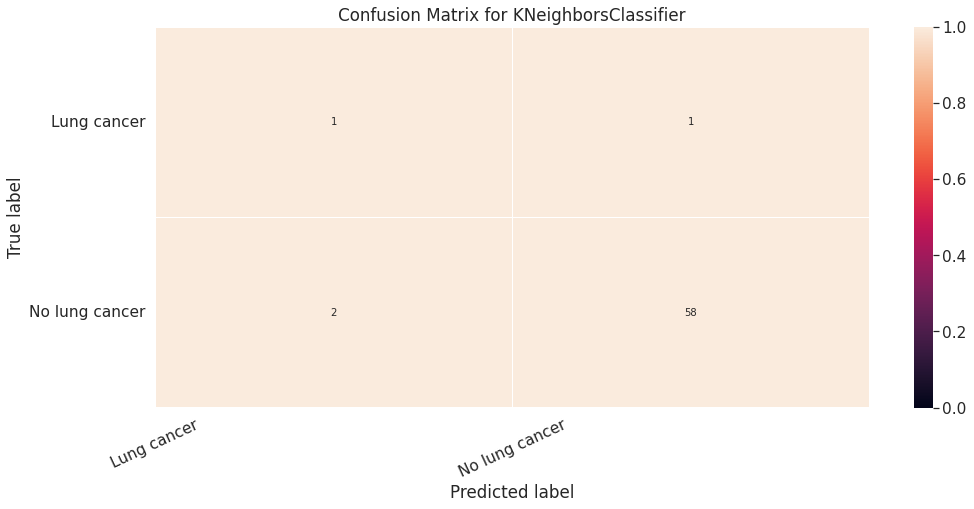

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)


class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



In [ ]:
# Comparasion of Success of Models

cv_result = [cv_result_dt, cv_result_svc, cv_result_lr, cv_result_rf, cv_result_knn]

                ML Models  Cross Validation Means
0  DecisionTreeClassifier                0.874500
1                     SVM                0.907000
2  RandomForestClassifier                0.919167
3      LogisticRegression                0.890667
4    KNeighborsClassifier                0.898333


Text(0.5, 1.0, 'Cross Validation Scores')

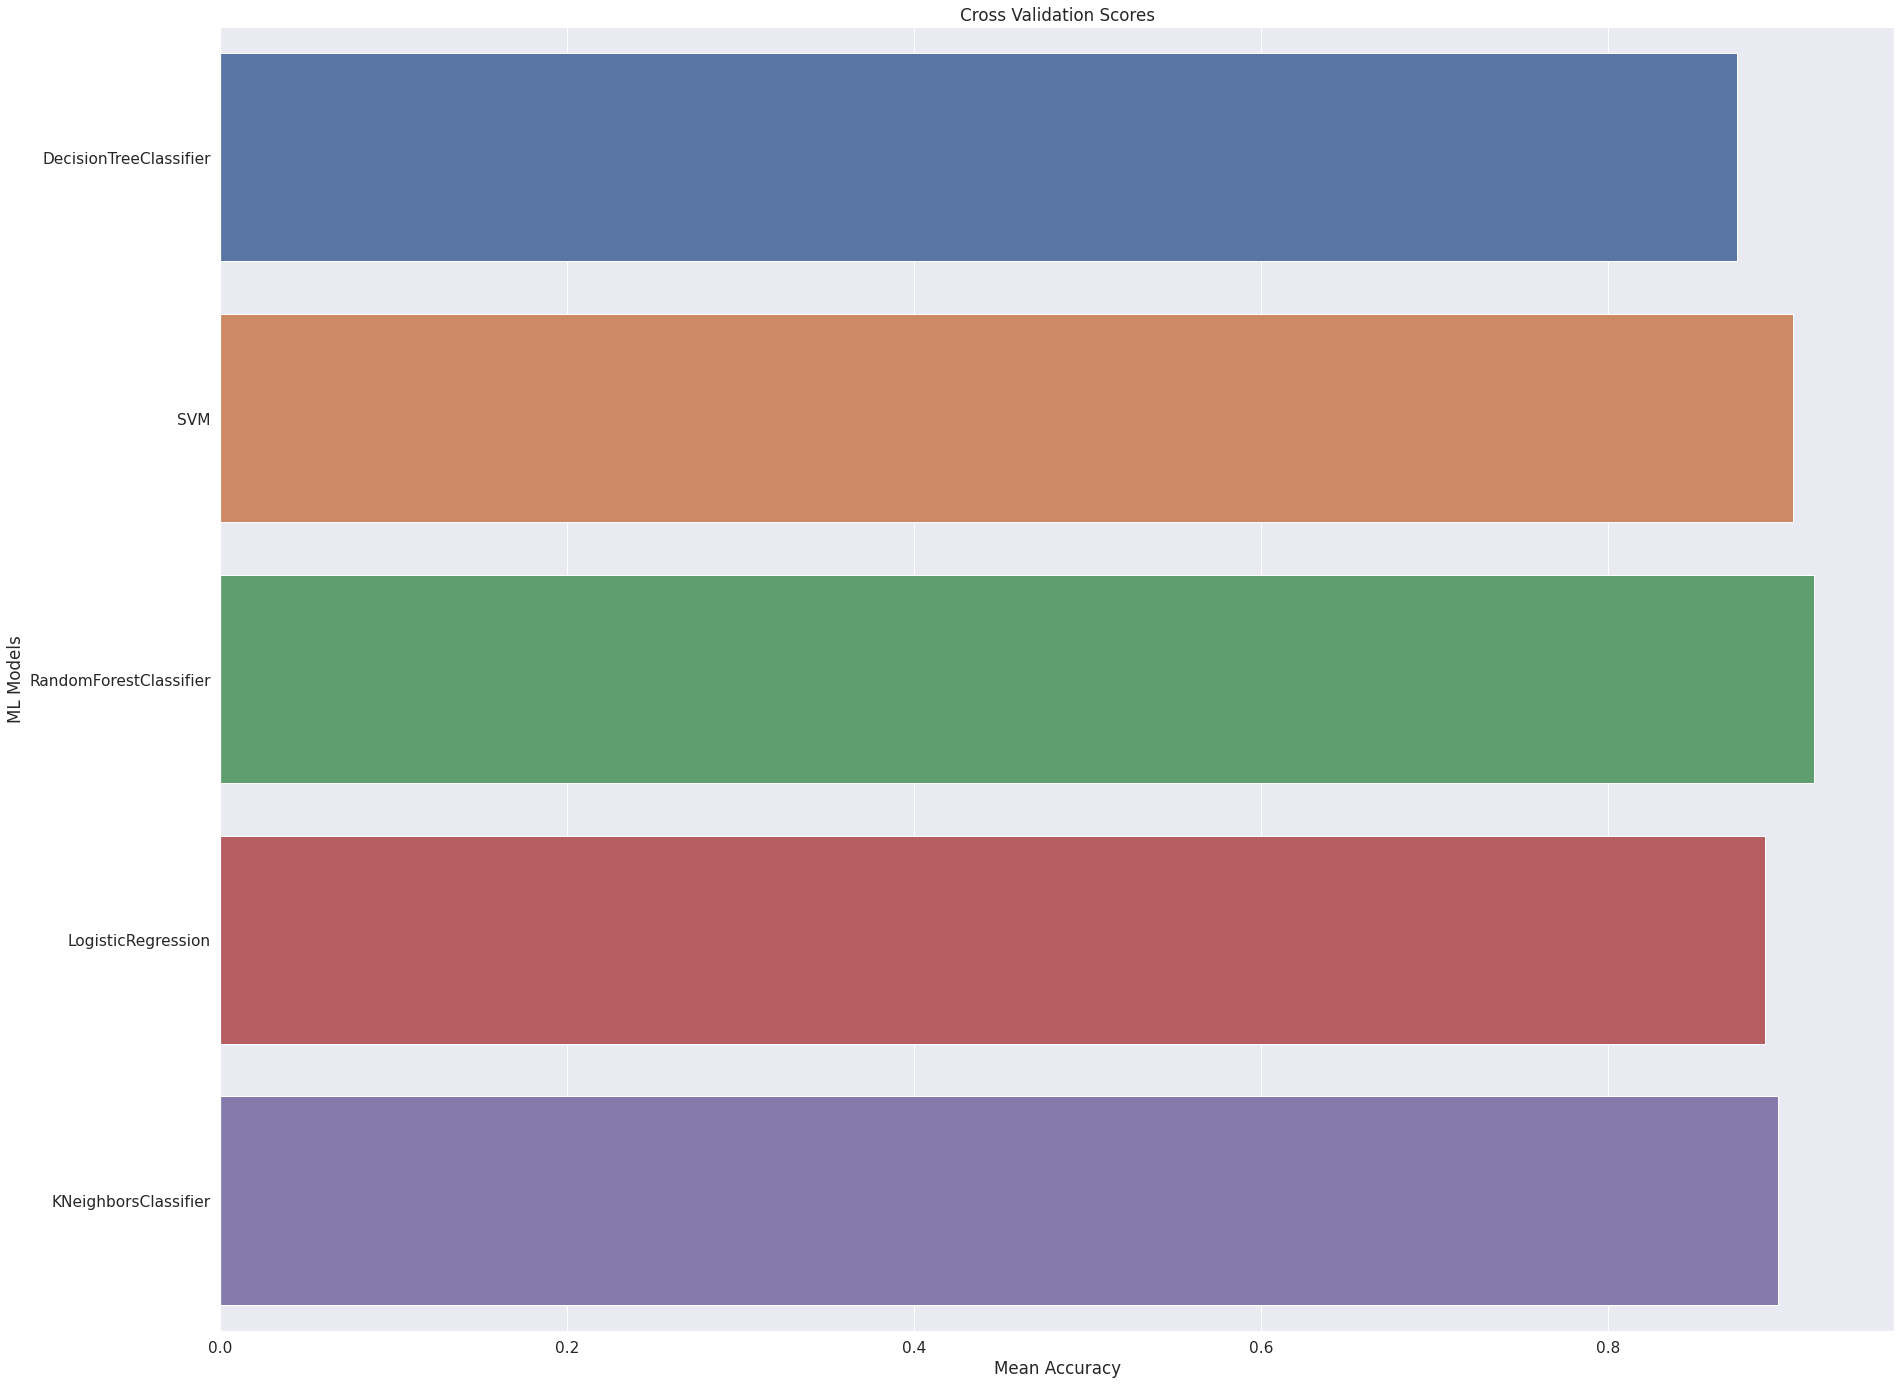

In [ ]:
cv_results = pd.DataFrame({"ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"], 
                           "Cross Validation Means":cv_result,   })

print(cv_results)

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [ ]:
# Ensemble Modelling

votingC = VotingClassifier(estimators = [("rf",best_estimators_rf),
                                        ("lr",best_estimators_lr),
                                        ("knn",best_estimators_knn)],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
y_pred_em = votingC.predict(X_test)
print("Ensemble Modelling Accuracy Score :",accuracy_score(votingC.predict(X_test),y_test))

Ensemble Modelling Accuracy Score : 0.967741935483871


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_em)
conf_matrix

array([[ 1,  1],
       [ 1, 59]])

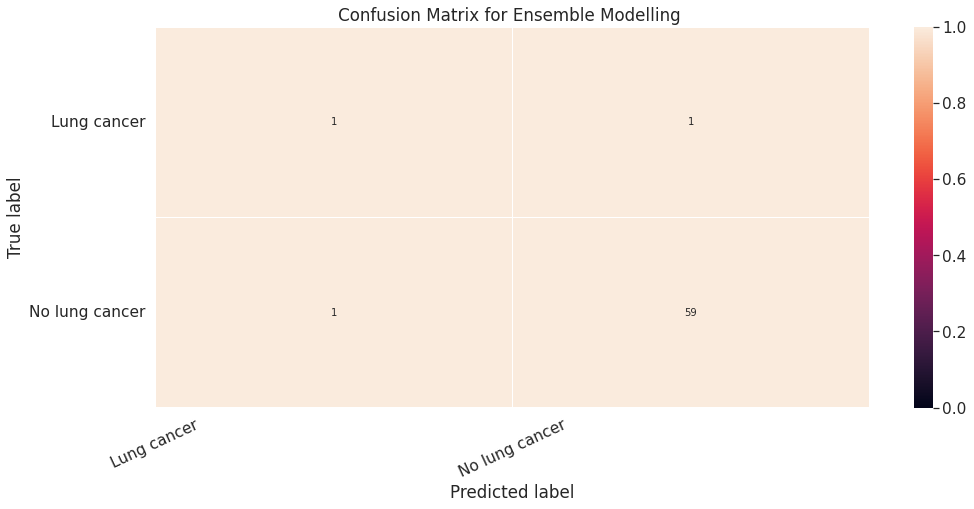

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Ensemble Modelling ')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_em))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

